In [54]:
import numpy as np
import matplotlib.pyplot as plt
import gillespy2
import pickle
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import random
from scipy.special import factorial

In [55]:
import gillespy2

def ToggleSwitch2D(parameter_values=None):
    # Initialize the model
    model = gillespy2.Model(name="toggle_switch_2d")

    # Define parameters
    beta1_val = gillespy2.Parameter(name='beta1_val', expression=10)
    K1_val = gillespy2.Parameter(name='K1_val', expression=80)
    n1_val = gillespy2.Parameter(name='n1_val', expression=2)
    a1_val = gillespy2.Parameter(name='a1_val', expression=0.03) 
    K2_val = gillespy2.Parameter(name='K2_val', expression=20)  
    n2_val = gillespy2.Parameter(name='n2_val', expression=2)
    beta2_val = gillespy2.Parameter(name='beta2_val', expression=20)
    a2_val = gillespy2.Parameter(name='a2_val', expression=0.03) 
    K3_val = gillespy2.Parameter(name='K3_val', expression=40)  
    n3_val = gillespy2.Parameter(name='n3_val', expression=2)
    a3_val = gillespy2.Parameter(name='a3_val', expression=0.06)
    beta3_val = gillespy2.Parameter(name='beta3_val', expression=20) 
    model.add_parameter([beta1_val, K1_val, n1_val, a1_val,beta2_val ,K2_val, n2_val, a2_val,beta3_val,K3_val,n3_val,a3_val]) 

    # Define molecular species
    x1 = gillespy2.Species(name='x1', initial_value=200)
    x2 = gillespy2.Species(name='x2', initial_value=200)
    x3 = gillespy2.Species(name='x3', initial_value=200)
    model.add_species([x1, x2,x3])

    # Define reactions
    r1 = gillespy2.Reaction(name="r1", reactants={}, products={x1: 1},
                            propensity_function="beta1_val*(pow(K1_val,n1_val)/(pow(K1_val,n1_val)+pow(x1,n1_val)))")
                            
    r2=gillespy2.Reaction(name="r2", reactants={x1:1}, products={},propensity_function="a1_val*x1")
    r3= gillespy2.Reaction(name="r3", reactants={}, products={x2: 1},
                            propensity_function="beta2_val*(pow(x1,n2_val)/(pow(K2_val,n2_val)+pow(x1,n2_val)))")  
    r4 = gillespy2.Reaction(name="r4", reactants={x2: 1}, products={},
                            propensity_function="a2_val*x2")
    r5 = gillespy2.Reaction(name="r5", reactants={}, products={x3: 1},
                            propensity_function="beta3_val*(pow(x2,n3_val)/(pow(K3_val,n3_val)+pow(x2,n3_val)))")  
    r6 = gillespy2.Reaction(name="r6", reactants={x3: 1}, products={},
                            propensity_function="a3_val*x3")

    model.add_reaction([r1,r2,r3,r4,r5,r6])

    tspan = gillespy2.TimeSpan.linspace(t=500, num_points=5000)
    model.timespan(tspan)

    return model

In [56]:
model = ToggleSwitch2D()
s_results = model.run()
ssa_results = model.run(algorithm="SSA")


In [57]:
X1_ssa = ssa_results['x1']
t_ssa = ssa_results['time']

#X1_tau = tau_results['x1']
#t_tau = tau_results['time']

t = ssa_results['time']

X2_ssa = ssa_results['x2']
t_ssa = ssa_results['time']
X3_ssa = ssa_results['x3']
#X2_tau = tau_results['x2']
#t_tau = tau_results['time']

In [58]:
beta1_val=10
K1_val=80
n1_val=2
a1_val=0.03
beta2_val=20
K2_val=20
n2_val=2
a2_val=0.03
beta3_val=20
K3_val=40
n3_val=2
a3_val=0.06
x1_0=200
x2_0=200
x3_0=200
fT=500
t_ori= np.linspace(0,fT,5000) 
dt = t[1] - t[0]
print(dt)

0.10002


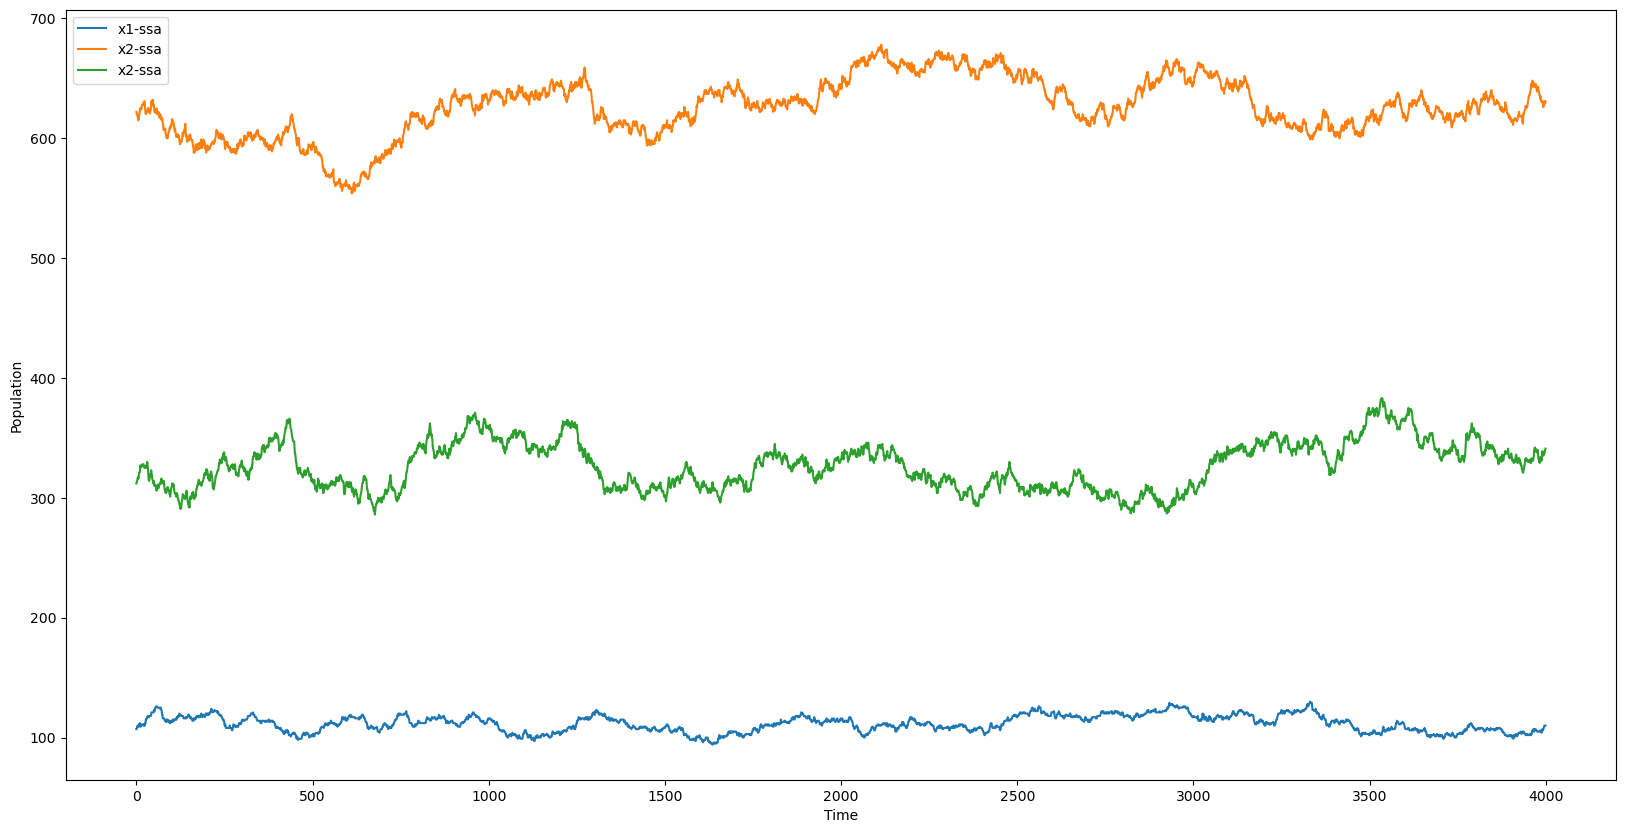

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.plot(X1_ssa[1000:], label='x1-ssa')
#plt.plot(X1_tau[1000:], label='X1-tau')
#plt.plot(X2_tau[1000:], label='X2-tau')
plt.plot(X2_ssa[1000:], label='x2-ssa')
plt.plot(X3_ssa[1000:], label='x2-ssa')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')


plt.show()

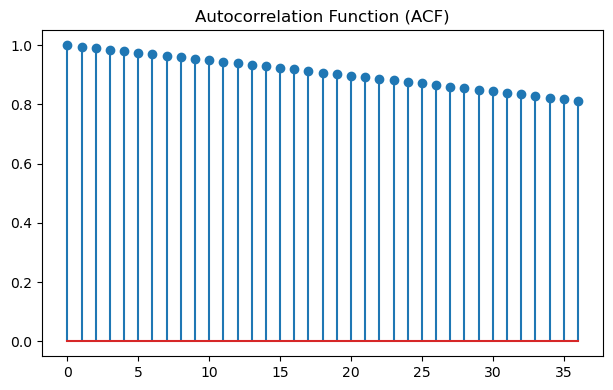

In [60]:
import statsmodels.api as sm
# Calculate the autocorrelation function (ACF)
acf1 = sm.tsa.acf(X1_ssa, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(X1_ssa)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf1)
plt.title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()

In [61]:
threshold = 0.2

try:
    autocorrelation_time = next(i for i, acf_value in enumerate(acf1) if acf_value < threshold)
except StopIteration:
    autocorrelation_time = len(acf1)  
print(f"Autocorrelation Time: {autocorrelation_time}")


Autocorrelation Time: 37


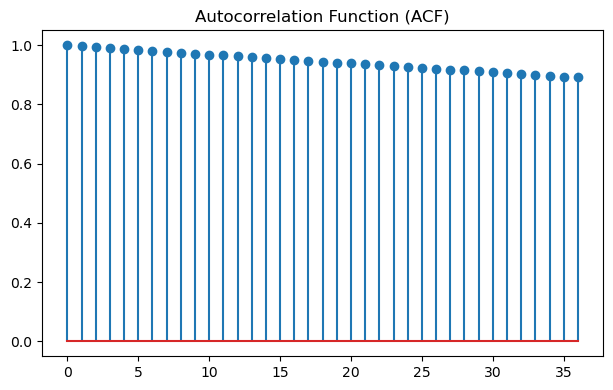

In [62]:
acf2 = sm.tsa.acf(X2_ssa, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(X2_ssa)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf2)
plt.title('Autocorrelation Function (ACF)')



plt.tight_layout()
plt.show()

In [63]:
threshold = 0.2

try:
    autocorrelation_time = next(i for i, acf_value in enumerate(acf2) if acf_value < threshold)
except StopIteration:
    autocorrelation_time = len(acf2)  
print(f"Autocorrelation Time: {autocorrelation_time}")


Autocorrelation Time: 37


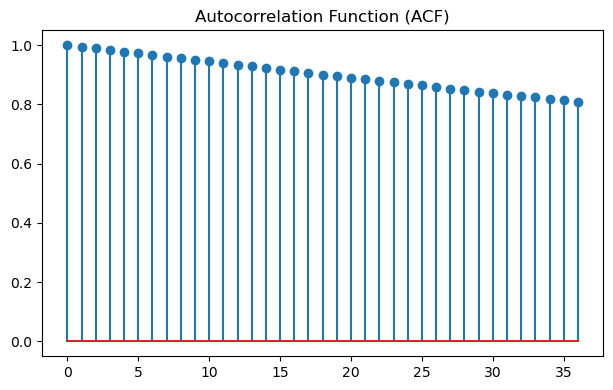

In [64]:
acf3 = sm.tsa.acf(X3_ssa, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(X3_ssa)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf3)
plt.title('Autocorrelation Function (ACF)')



plt.tight_layout()
plt.show()

In [65]:
threshold = 0.2

try:
    autocorrelation_time = next(i for i, acf_value in enumerate(acf3) if acf_value < threshold)
except StopIteration:
    autocorrelation_time = len(acf3)  
print(f"Autocorrelation Time: {autocorrelation_time}")


Autocorrelation Time: 37


Text(0.5, 1.0, 'X2,$\\mu$ = 324.507, $\\sigma$ = 25.363')

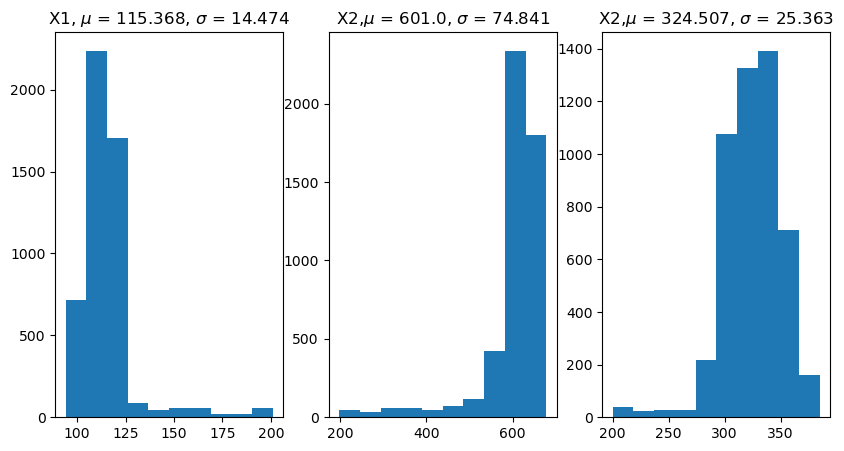

In [66]:
fig, axs = plt.subplots(1,3,figsize = (10,5))
axs[0].hist(X1_ssa)
axs[0].set_title('X1, $\mu$ = %s, $\sigma$ = %s' % (np.round(np.mean(X1_ssa),3),np.round(np.std(X1_ssa),3)))
axs[1].hist(X2_ssa)
axs[1].set_title('X2,$\mu$ = %s, $\sigma$ = %s' % (np.round(np.mean(X2_ssa),3),np.round(np.std(X2_ssa),3)))
axs[2].hist(X3_ssa)
axs[2].set_title('X2,$\mu$ = %s, $\sigma$ = %s' % (np.round(np.mean(X3_ssa),3),np.round(np.std(X3_ssa),3)))


In [67]:
with open('example.pickle_ssa', 'wb') as f:
    
    pickle.dump([beta1_val,K1_val,n1_val,a1_val,beta2_val,K2_val,n2_val,a2_val,beta3_val,K3_val,n3_val, a3_val,x1_0,x2_0,x3_0,fT,t_ori,X1_ssa[1000:],X2_ssa[1000:],X3_ssa[1000:] ], f)